**1. Métodos numéricos para EDO**

**1.1. Método de Euler**

Dado o problema de valor inicial 
\begin{equation*}
\left\{
\begin{array}{ll}
\dfrac{dy}{dx} = f(x,y), ~ \forall x \in [a,b]=[x_0,x_n] & \\[10pt]
y(x_0)= y_0, & 
\end{array}
\right.
\end{equation*}

o **Método de Euler** com passo 

\begin{equation*}
h = \dfrac{b - a}{n} = \dfrac{x_n - x_0}{n},
\end{equation*}

onde $a = x_0$ é o nó inicial e $b = x_n$ é o nó final do domínio $[a,b]$,

consiste em se aplicar a fórmula iterativa
\begin{equation*}
y_{k+1} =  y_k + h ~f(x_k,y_k), \quad k = 0,1,2,\ldots, n-1,
\end{equation*}

para calcular aproximações sucessivas $y_1, y_2, y_3, \dots, y_n$ para os valores verdadeiros $y(x_1), y(x_2), y(x_3), \dots, y(x_n)$ da solução exata $y(x)$ nos pontos $x_1, x_2, x_3, \dots, x_n$, respectivamente.


**1.2. Método de Euler melhorado (RK2 - Runge-Kutta de 2a. Ordem)**

Já o **Método de Euler melhorado (RK2)** com passo $h$ consiste em se aplicar as seguintes fórmulas iterativas para $k = 0, 1, \ldots, n-1$:
\begin{align*}
K_1 &= f(x_k,y_k), \\
p_{k+1} &= y_k + h ~K_1 \text{ (preditor)}, \\
K_2 &= f(x_{k+1}, p_{k+1}), \\
y_{k+1} &= y_k + h ~ \Big( \dfrac{K_1 + K_2}{2} \Big) \text{ (corretor)}
\end{align*}

para calcular aproximações sucessivas $y_1, y_2, y_3, \dots, y_n$ para os valores verdadeiros $y(x_1), y(x_2), y(x_3), \dots, y(x_n)$ da solução exata $y(x)$ nos pontos $x_1, x_2, x_3, \dots, x_n$, respectivamente.


In [4]:
# Importar a biblioteca numpy,  
# biblioteca permite trabalhar com a manipulação de objetos array multidimensionais, 
# além de seus objetos derivados, como matrizes, sequências, e outros.
# A função exp(x) pertence a esta biblioteca.import numpy as np
import numpy as np

# Importar a biblioteca math para definição das constantes matemáticas (Pi, por exemplo):
import math

# Função para a EDO de 1a ordem:
def f(x,y):
    
    dy_dx = x + y

    return dy_dx

# Função para a solução exata dos exemplos:
def y_exata(x):

    return 2 * np.exp(x) - x - 1
    # return np.exp(-2 * x)


# Condição inicial:
x_0 = 0
y_0 = 1

# Ponto final:
x_n = 1

# Numero de intervalos (passos):
n = 20

### Gera 1000 pontos igualmente espaçados no intervalo [x_0,x_n]
x_ex = np.linspace(x_0, x_n, 1000)  

#  Solucao analitica (exata)
y_ex = y_exata(x_ex)


# Passo h:
h = (x_n - x_0)/n


## Gera n pontos igualmente espaçados no intervalo [x_0,x_n]
## com tamanho h para cada subintervalo
x_aprox = np.linspace(x_0, x_n, n+1)  

# Indice k inicial para os algoritmos dos métodos de Euler e Euler aproximado:
k = 0

# Cria um vetor y para a solução aproximada do método de Euler:
y_Euler = np.zeros((n+1, 1))

# Cria um vetor p preditor para a solução aproximada do método de Euler melhorado (RK2):
p_RK2 = np.zeros((n+1, 1))

# Cria um vetor y corretor para a solução aproximada do método de Euler melhorado (RK2):
y_RK2 = np.zeros((n+1, 1))

# Cria um vetor y para a solução exata nos nós:
y_exata_nos = np.zeros((n+1, 1))

# Solução aproximada na condição inicial do problema:
y_Euler[0] = y_0
y_RK2[0] = y_0

# Solução exata na condição inicial do problema:
y_exata_nos[0] = y_0


for k in range(0,len(x_aprox)-1):

    # Método de Euler:
    K = f(x_aprox[k],y_Euler[k])
    y_Euler[k+1] = y_Euler[k] + h * f(x_aprox[k],y_Euler[k]) 

    # Método de Euler melhorado:
    K_1 = f(x_aprox[k],y_RK2[k])
    p_RK2[k+1] = y_RK2[k] + h * K_1 
    K_2 = f(x_aprox[k+1],p_RK2[k+1])
    y_RK2[k+1] = y_RK2[k] + (h/2) * (K_1 + K_2)

    # Solução analítica:
    y_exata_nos[k+1] = y_exata(x_aprox[k+1])


print('\n\n')

print('Euler: \n\n', y_Euler)
print('\n\n')

print('Euler melhorado (RK2): \n\n', y_RK2)
print('\n\n')

print('Solução exata: \n\n', y_exata_nos)
print('\n\n')

end = len(y_exata_nos) - 1
print('Erro Absoluto Euler: \n\n', np.abs(y_exata_nos[end] - y_Euler[end]))
print('\n\n')

print('Erro Absoluto RK2: \n\n', np.abs(y_exata_nos[end] - y_RK2[end]))
print('\n\n')





Euler: 

 [[1.        ]
 [1.05      ]
 [1.105     ]
 [1.16525   ]
 [1.2310125 ]
 [1.30256312]
 [1.38019128]
 [1.46420085]
 [1.55491089]
 [1.65265643]
 [1.75778925]
 [1.87067872]
 [1.99171265]
 [2.12129828]
 [2.2598632 ]
 [2.40785636]
 [2.56574918]
 [2.73403664]
 [2.91323847]
 [3.10390039]
 [3.30659541]]



Euler melhorado (RK2): 

 [[1.        ]
 [1.0525    ]
 [1.11025313]
 [1.1735286 ]
 [1.24260944]
 [1.31779317]
 [1.39939257]
 [1.48773644]
 [1.58317043]
 [1.68605792]
 [1.79678089]
 [1.91574091]
 [2.04336013]
 [2.18008234]
 [2.32637406]
 [2.48272573]
 [2.64965292]
 [2.82769763]
 [3.01742963]
 [3.2194479 ]
 [3.43438211]]



Solução exata: 

 [[1.        ]
 [1.05254219]
 [1.11034184]
 [1.17366849]
 [1.24280552]
 [1.31805083]
 [1.39971762]
 [1.4881351 ]
 [1.5836494 ]
 [1.68662437]
 [1.79744254]
 [1.91650604]
 [2.0442376 ]
 [2.18108166]
 [2.32750541]
 [2.48400003]
 [2.65108186]
 [2.8292937 ]
 [3.01920622]
 [3.22141932]
 [3.43656366]]



Erro Absoluto Euler: 

 [0.12996825]



Erro Abso

**4. Plotagem dos gráficos**

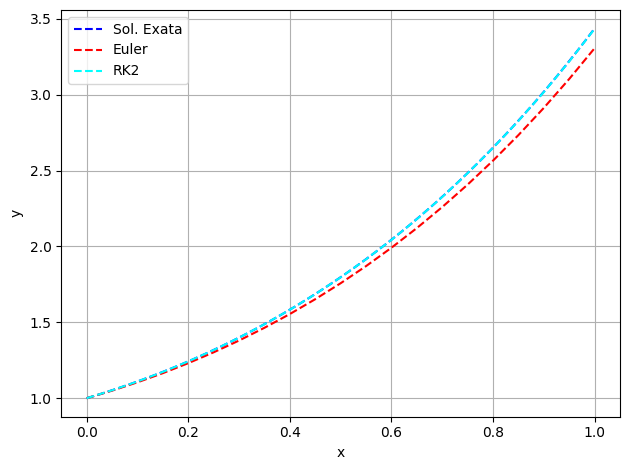

In [6]:
# Importar a biblioteca matplotlib.pyplot para exibição dos gráficos:
import matplotlib.pyplot as plt

################################################################################
### ------------ Gráfico da solução --------------------------------------------
################################################################################

# Subplots são conjuntos de pequenos gráficos que residem dentro de uma única figura.
# Para criar subplots em Matplotlib, utilizamos a função subplots(). 
# Esta função retorna uma figura (fig) e um conjunto de eixos (axes), que são os subplots em si. 
# Quando o argumento da função subplots é vazio, apenas um gráfico é gerado na figura
fig, ax = plt.subplots()

### Plotagem do gráfico da solução analítica:
ax.plot(x_ex, y_ex, label='Sol. Exata', color='blue', linestyle='--')

### Plotagem do gráfico da solução aproximada de Euler:
ax.plot(x_aprox, y_Euler, label='Euler', color='red', linestyle='--')

### Plotagem do gráfico da solução aproximada de RK2:
ax.plot(x_aprox, y_RK2, label='RK2', color='cyan', linestyle='--')

### Para o gráfico da solução exata:
### Legenda 'x' para o eixo x:
ax.set_xlabel('x')
### Legenda 'y' para o eixo y:
ax.set_ylabel('y')
### Exibe grades no gráfico:
ax.grid()
### Exibe legenda no gráfico:
ax.legend()

### A biblioteca Matplotlib fornece a função tight_layout(), 
### uma solução simples para ajustar automaticamente 
### os parâmetros de subtramas e garantir que os gráficos 
### estejam perfeitamente espaçados, sem sobreposição.
fig.tight_layout()

### Função da biblioteca Matplotlib que exibe a janela gráfica:
plt.show()

